**Neural Network Project**

**DOMAIN:** Electronics and Telecommunication

**CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. 
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various 
parameters. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [2]:
print(tf.__version__)

2.11.0


In [3]:
# A. Read the ‘Signals.csv’ as DataFrame and import required libraries
signal_data = pd.read_csv("Signal.csv")

In [4]:
signal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# B. Check for missing values and print percentage for each attribute
missing_val_percent = signal_data.isnull(). sum() * 100 / len(signal_data)
print("Missing_val_percent")
print(missing_val_percent)

Missing_val_percent
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [6]:
# dupliate Rows occurrence based on all columns
#C. Check for presence of duplicate records in the dataset and impute with appropriate method
duplicate = signal_data[signal_data.duplicated()]

In [7]:
print("Duplicate Rows :")
print(duplicate)
print("Total Dublication Rows: ",signal_data.duplicated().sum())

Duplicate Rows :
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0  

In [8]:
after_dublicate_remove_signal_data=signal_data.drop_duplicates()

In [9]:
print(after_dublicate_remove_signal_data.shape)
print("total dublicate After Revmove::",after_dublicate_remove_signal_data.duplicated().sum())

(1359, 12)
total dublicate After Revmove:: 0


In [10]:
# OR this ways also same 
signal_data.drop_duplicates(inplace =True)

In [11]:
signal_data.shape

(1359, 12)

In [12]:
#Removing Dublicate Columns non dublicate only
no_dup_columns = signal_data.T.drop_duplicates().T

In [13]:
no_dup_columns

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
5             7.4        0.660         0.00          1.8        0.075   
...           ...          ...          ...          ...          ...   
1593          6.8        0.620         0.08          1.9        0.068   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0         34.0      0.99780         3.51          0.56   
1            25.0         67.0      0.99680         3.20          0.68   
2            15.0         54.0      0.99700         3.26          0.65   
3            17.0         60.0      0.99800         3.16          0.58   
5            13.0         40.0      0.99780         3.51          0.56   
...           ...          ...          ...          ...           ...   
1593         28.0         38.0      0.99651         3.42          0.82   
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
0              9.4              5.0  
1              9.8              5.0  
2              9.8              5.0  
3              9.8              6.0  
5              9.4              5.0  
...            ...              ...  
1593           9.5              6.0  
1594          10.5              5.0  
1595          11.2              6.0  
1597          10.2              5.0  
1598          11.0              6.0  

[1359 rows x 12 columns]

In [14]:
after_dublicate_remove_signal_data.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000   
mean      8.310596     0.529478     0.272333     2.523400     0.088124   
std       1.736990     0.183031     0.195537     1.352314     0.049377   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.430000     2.600000     0.091000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1359.000000  1359.000000  1359.000000  1359.000000   1359.000000   
mean     15.893304    46.825975     0.996709     3.309787      0.658705   
std      10.447270    33.408946     0.001869     0.155036      0.170667   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996700     3.310000      0.620000   
75%      21.000000    63.000000     0.997820     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1359.000000      1359.000000  
mean      10.432315         5.623252  
std        1.082065         0.823578  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

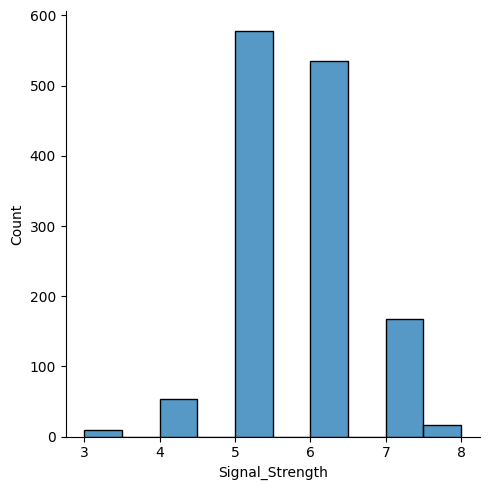

In [15]:
sns.displot(after_dublicate_remove_signal_data, x="Signal_Strength",  binwidth=0.5)
plt.show()

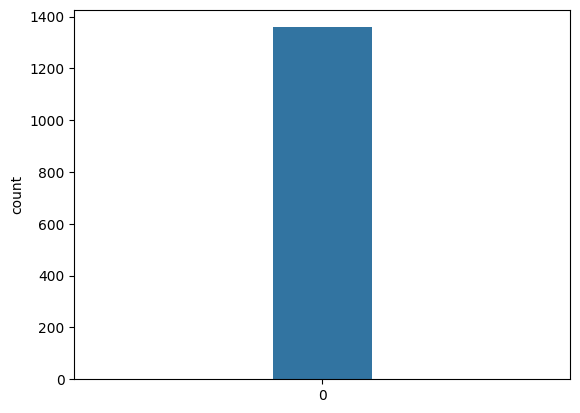

In [16]:
sns.countplot(signal_data['Signal_Strength'], width=0.2)
plt.show()

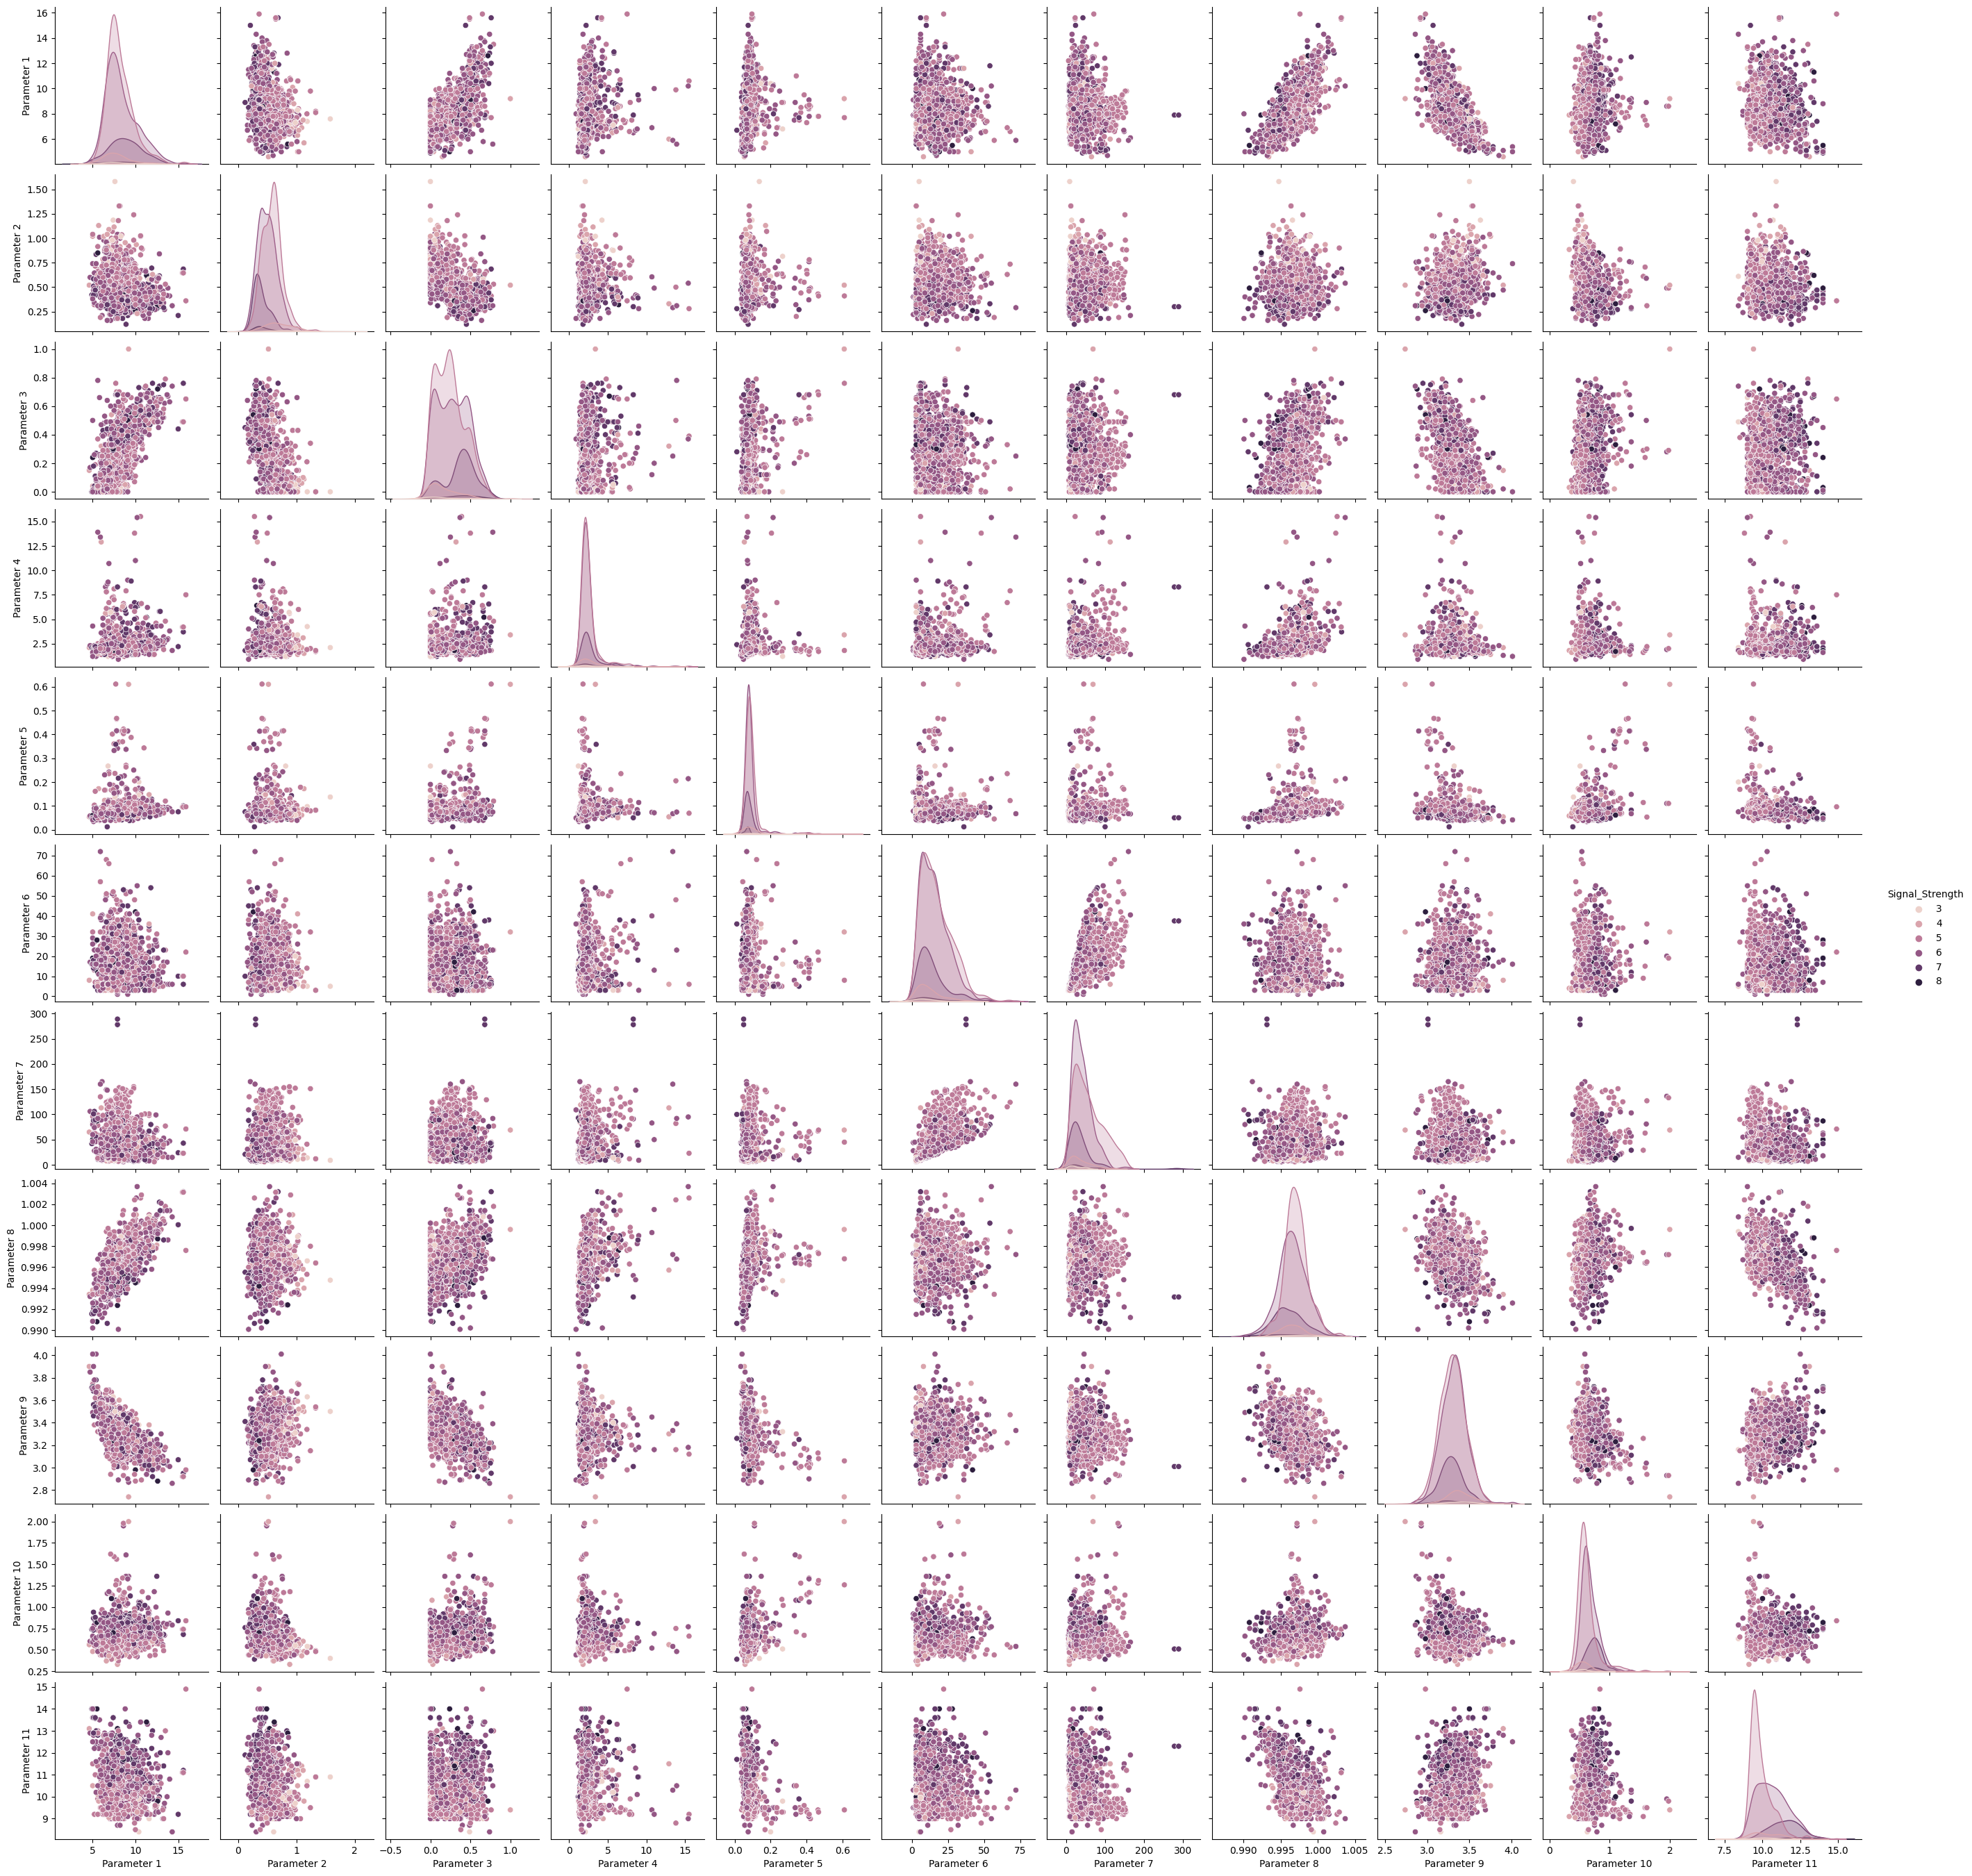

In [17]:
sns.pairplot(after_dublicate_remove_signal_data,diag_kind='kde',hue='Signal_Strength')
plt.show()

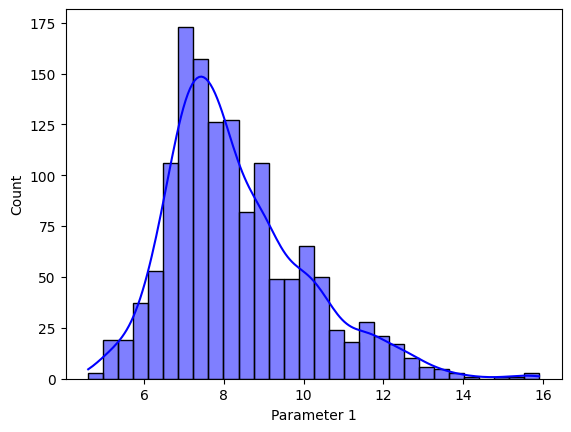

Distribution Parameter 1
Mean is: 8.310596026490067
Median is: 7.9
Mode is: 0    7.2
Name: Parameter 1, dtype: float64
Standard deviation is: 1.7369898075324683
Skewness is: 0.9410413664561449
Maximum is: 15.9
Minimum is: 4.6


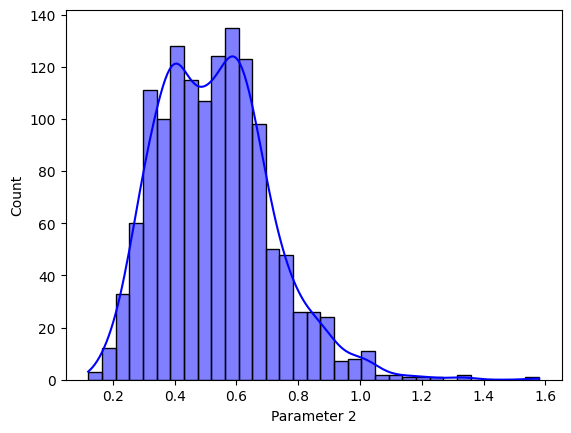

Distribution Parameter 2
Mean is: 0.5294775570272259
Median is: 0.52
Mode is: 0    0.5
Name: Parameter 2, dtype: float64
Standard deviation is: 0.1830313176190719
Skewness is: 0.7292789463991854
Maximum is: 1.58
Minimum is: 0.12


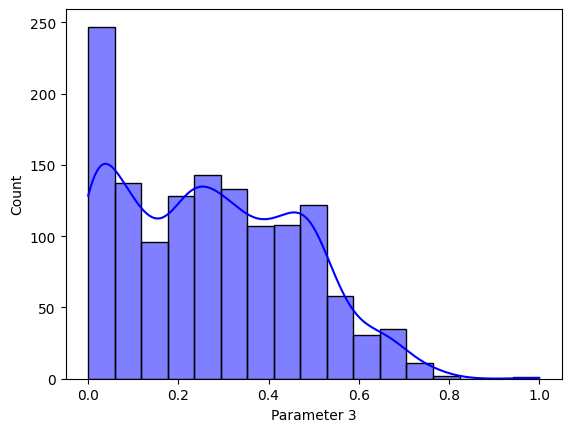

Distribution Parameter 3
Mean is: 0.2723325974981604
Median is: 0.26
Mode is: 0    0.0
Name: Parameter 3, dtype: float64
Standard deviation is: 0.1955365445504638
Skewness is: 0.31272554238899036
Maximum is: 1.0
Minimum is: 0.0


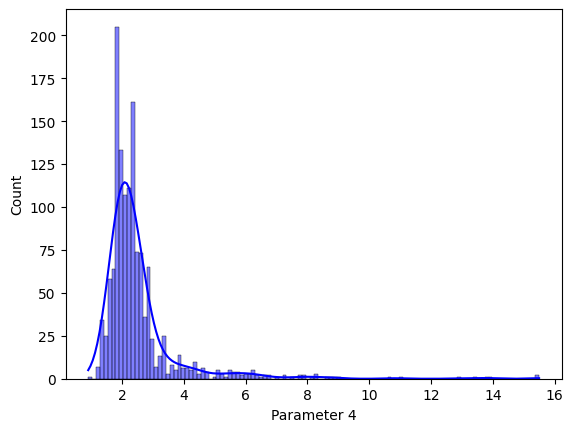

Distribution Parameter 4
Mean is: 2.5233995584988964
Median is: 2.2
Mode is: 0    2.0
Name: Parameter 4, dtype: float64
Standard deviation is: 1.3523137577104225
Skewness is: 4.548153403940447
Maximum is: 15.5
Minimum is: 0.9


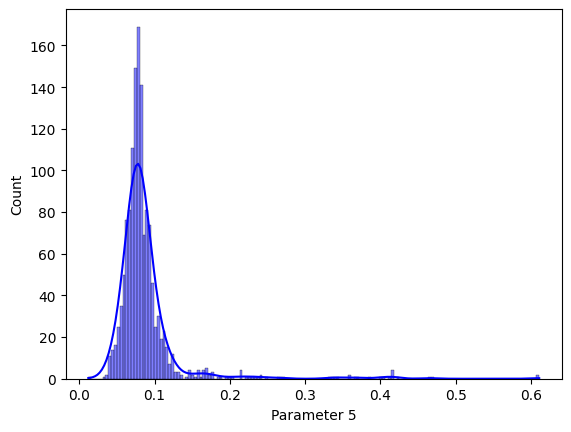

Distribution Parameter 5
Mean is: 0.08812362030905077
Median is: 0.079
Mode is: 0    0.08
Name: Parameter 5, dtype: float64
Standard deviation is: 0.04937686244348607
Skewness is: 5.502487294623722
Maximum is: 0.611
Minimum is: 0.012


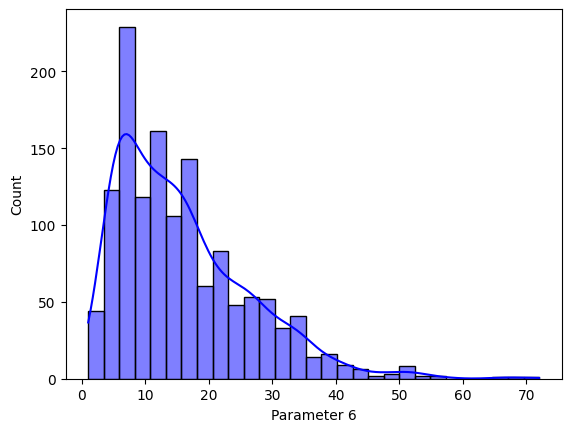

Distribution Parameter 6
Mean is: 15.893303899926417
Median is: 14.0
Mode is: 0    6.0
Name: Parameter 6, dtype: float64
Standard deviation is: 10.447270259048693
Skewness is: 1.2265794991760643
Maximum is: 72.0
Minimum is: 1.0


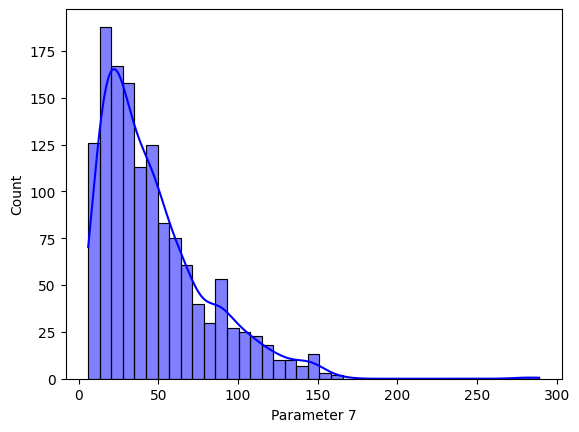

Distribution Parameter 7
Mean is: 46.82597498160412
Median is: 38.0
Mode is: 0    28.0
Name: Parameter 7, dtype: float64
Standard deviation is: 33.40894570661652
Skewness is: 1.5403680777213933
Maximum is: 289.0
Minimum is: 6.0


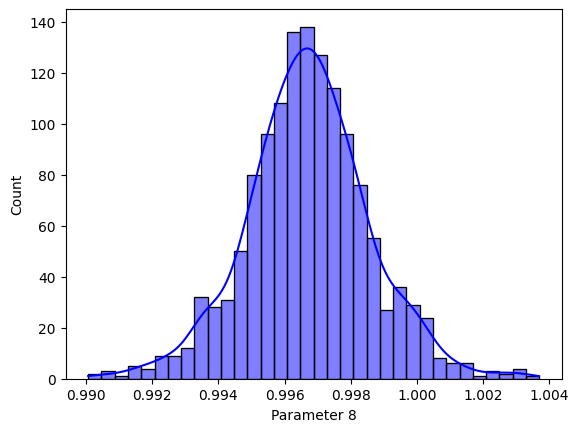

Distribution Parameter 8
Mean is: 0.9967089477557026
Median is: 0.9967
Mode is: 0    0.9968
Name: Parameter 8, dtype: float64
Standard deviation is: 0.0018689171325591413
Skewness is: 0.04477785573116107
Maximum is: 1.00369
Minimum is: 0.99007


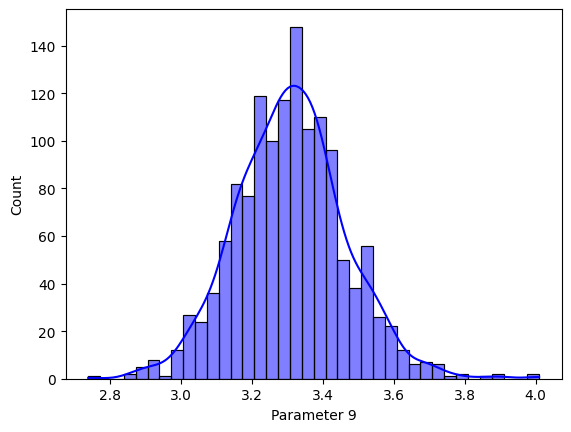

Distribution Parameter 9
Mean is: 3.309786607799853
Median is: 3.31
Mode is: 0    3.3
Name: Parameter 9, dtype: float64
Standard deviation is: 0.15503631128729617
Skewness is: 0.2320322752014824
Maximum is: 4.01
Minimum is: 2.74


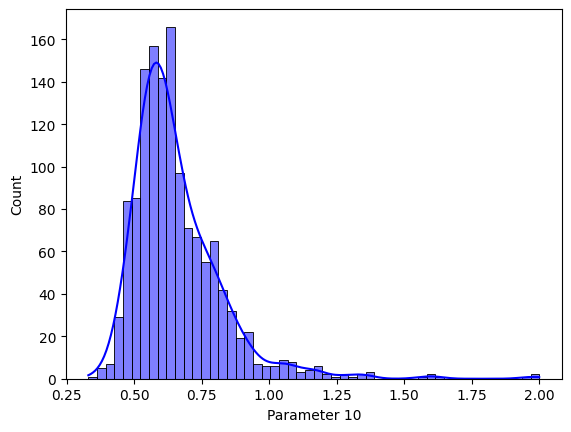

Distribution Parameter 10
Mean is: 0.6587049300956587
Median is: 0.62
Mode is: 0    0.54
Name: Parameter 10, dtype: float64
Standard deviation is: 0.17066689057420686
Skewness is: 2.4065046145674196
Maximum is: 2.0
Minimum is: 0.33


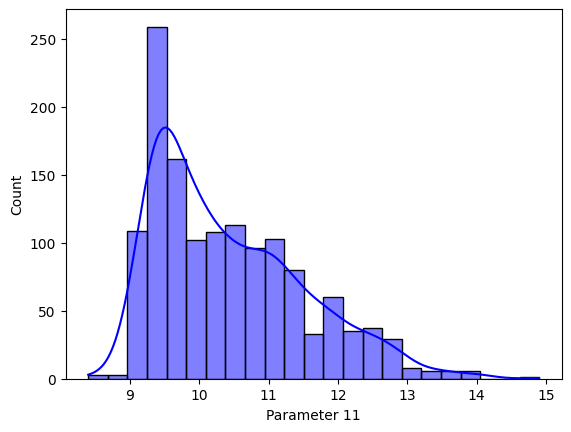

Distribution Parameter 11
Mean is: 10.432315428013245
Median is: 10.2
Mode is: 0    9.5
Name: Parameter 11, dtype: float64
Standard deviation is: 1.082065449949784
Skewness is: 0.8598411692319623
Maximum is: 14.9
Minimum is: 8.4


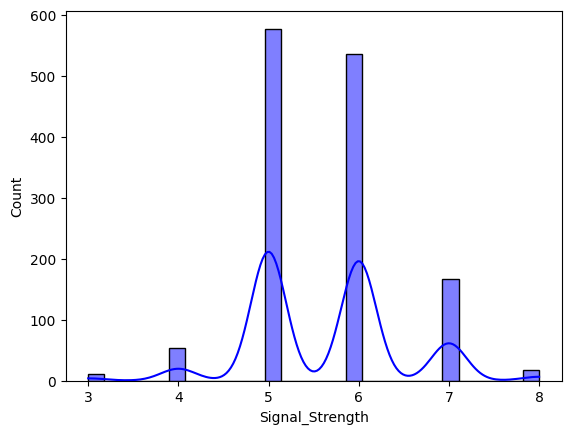

Distribution Signal_Strength
Mean is: 5.6232523914643116
Median is: 6.0
Mode is: 0    5
Name: Signal_Strength, dtype: int64
Standard deviation is: 0.8235780017165553
Skewness is: 0.19240658731658308
Maximum is: 8
Minimum is: 3


In [18]:
# inside the distribution of continuous attributes
cols = list(after_dublicate_remove_signal_data)
for i in np.arange(len(cols)):
    sns.histplot(after_dublicate_remove_signal_data[cols[i]], color='blue', kde=True)
    plt.show()
    print('Distribution',cols[i])
    print('Mean is:',after_dublicate_remove_signal_data[cols[i]].mean())
    print('Median is:',after_dublicate_remove_signal_data[cols[i]].median())
    print('Mode is:',after_dublicate_remove_signal_data[cols[i]].mode())
    print('Standard deviation is:',after_dublicate_remove_signal_data[cols[i]].std())
    print('Skewness is:',after_dublicate_remove_signal_data[cols[i]].skew())
    print('Maximum is:',after_dublicate_remove_signal_data[cols[i]].max())
    print('Minimum is:',after_dublicate_remove_signal_data[cols[i]].min())

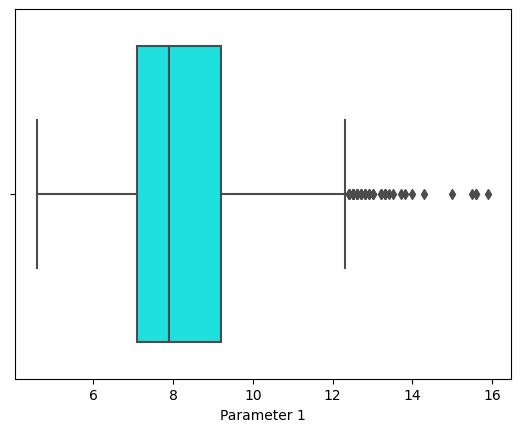

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1359  rows in data, number of outliers are: 41


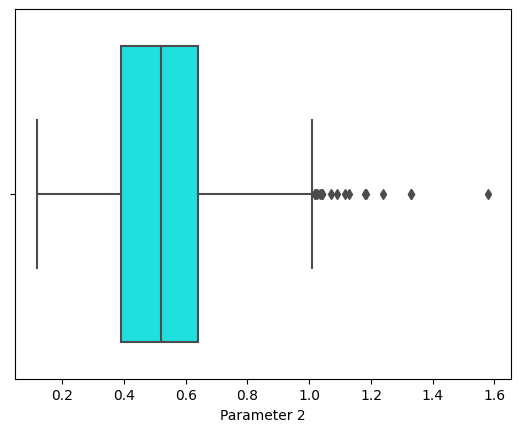

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1359  rows in data, number of outliers are: 19


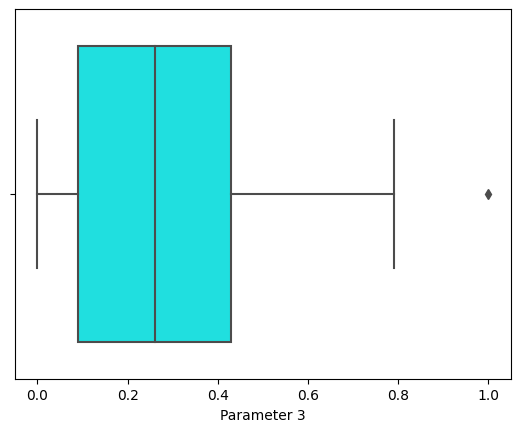

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33999999999999997
Lower Whisker, Upper Whisker :  -0.42000000000000004 , 0.94
Out of  1359  rows in data, number of outliers are: 1


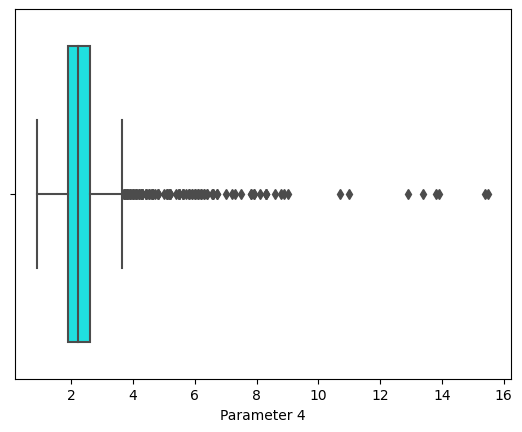

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1359  rows in data, number of outliers are: 126


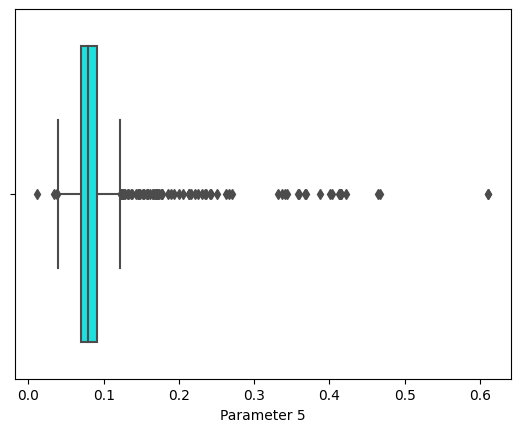

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.02099999999999999
Lower Whisker, Upper Whisker :  0.03850000000000002 , 0.12249999999999998
Out of  1359  rows in data, number of outliers are: 87


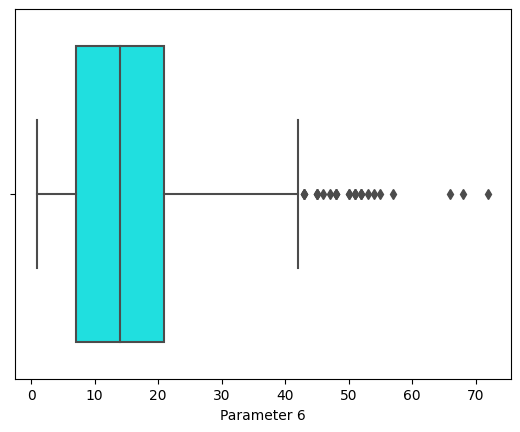

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1359  rows in data, number of outliers are: 26


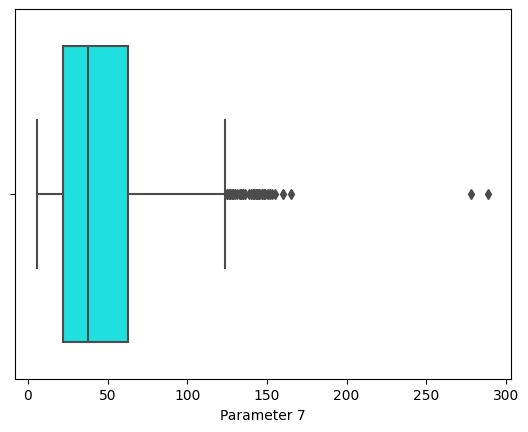

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Out of  1359  rows in data, number of outliers are: 45


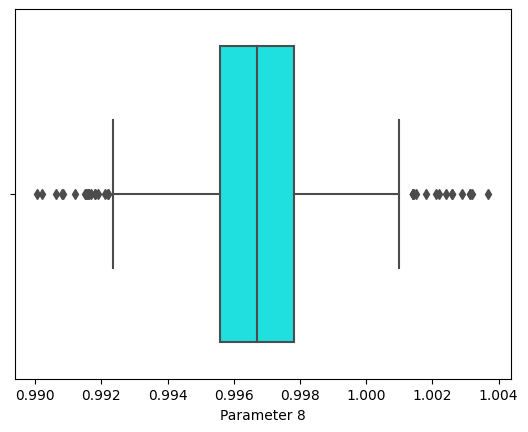

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.9967
Q3 is :  0.99782
IQR is: 0.0022199999999999998
Lower Whisker, Upper Whisker :  0.99227 , 1.00115
Out of  1359  rows in data, number of outliers are: 35


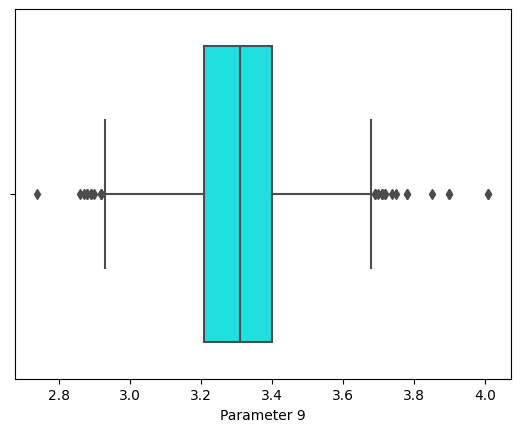

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1359  rows in data, number of outliers are: 28


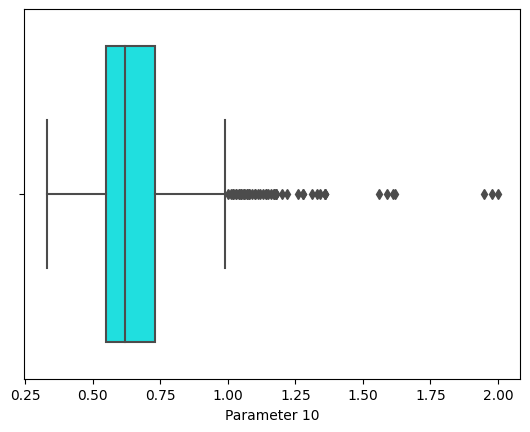

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1359  rows in data, number of outliers are: 55


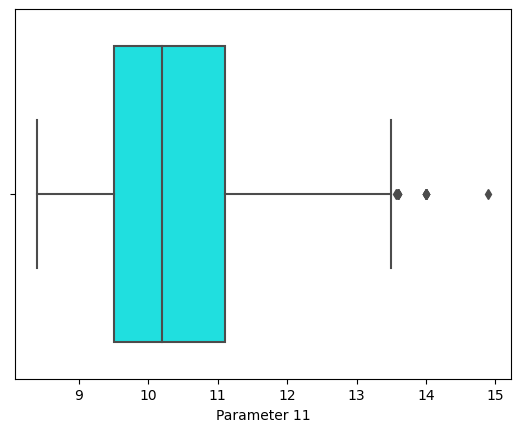

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1359  rows in data, number of outliers are: 12


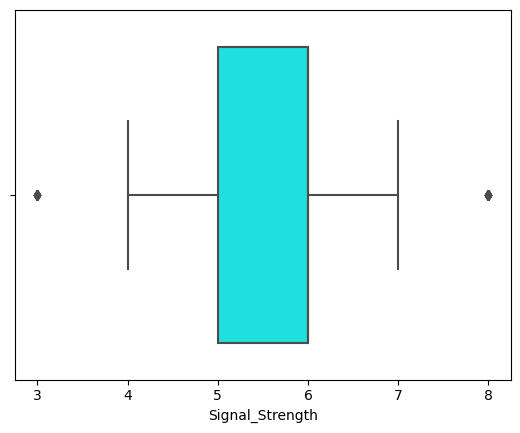

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1359  rows in data, number of outliers are: 27


In [19]:
# Checking the presence of outliers
def check_outliers(data):
    dt_len = len(data)
    col = list(data.columns)
    for i in np.arange(len(col)):
        sns.boxplot(x= data[col[i]], color='cyan')
        plt.show()
        print('Boxplot of ',col[i])
        #calculating the outiers in attribute 
        Q1 = data[col[i]].quantile(0.25)
        Q2 = data[col[i]].quantile(0.50)
        Q3 = data[col[i]].quantile(0.75) 
        IQR = Q3 - Q1
        L_W = (Q1 - 1.5 *IQR)
        U_W = (Q3 + 1.5 *IQR)    
        print('Q1 is : ',Q1)
        print('Q2 is : ',Q2)
        print('Q3 is : ',Q3)
        print('IQR is:',IQR)
        print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
        bools = (data[col[i]] < (Q1 - 1.5 *IQR)) |(data[col[i]] > (Q3 + 1.5 * IQR))
        print('Out of ',dt_len,' rows in data, number of outliers are:',bools.sum()) 

#show visualize inside outlier
check_outliers(after_dublicate_remove_signal_data)

In [20]:
# function to treat outliers
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [21]:
count,df=detect_treate_outliers(after_dublicate_remove_signal_data,'update')
if count>0:
    print('Updating dataset')
    after_dublicate_remove_signal_data=df

Updating dataset


After Outliner Remove Data inside visulization


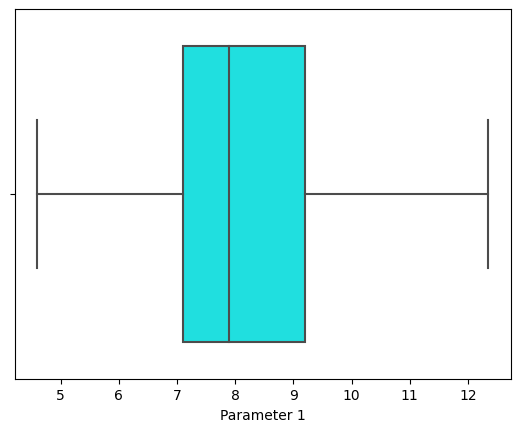

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1359  rows in data, number of outliers are: 0


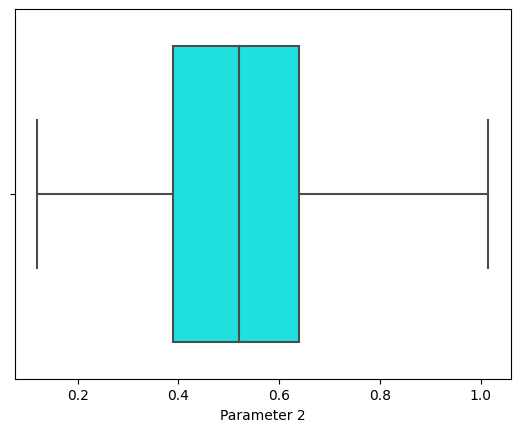

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1359  rows in data, number of outliers are: 0


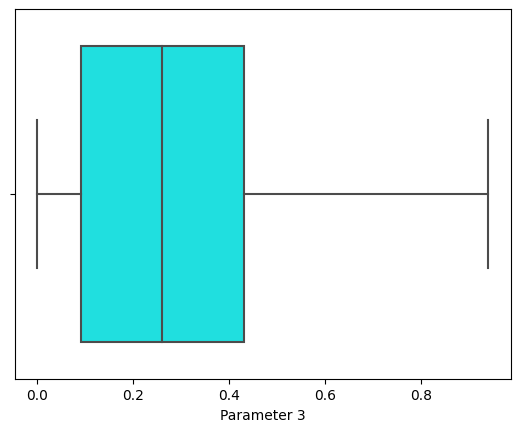

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33999999999999997
Lower Whisker, Upper Whisker :  -0.42000000000000004 , 0.94
Out of  1359  rows in data, number of outliers are: 0


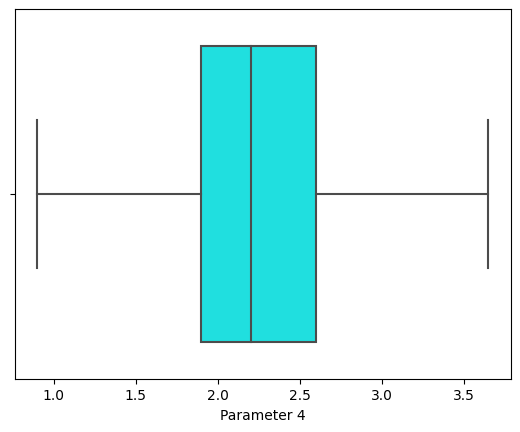

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1359  rows in data, number of outliers are: 0


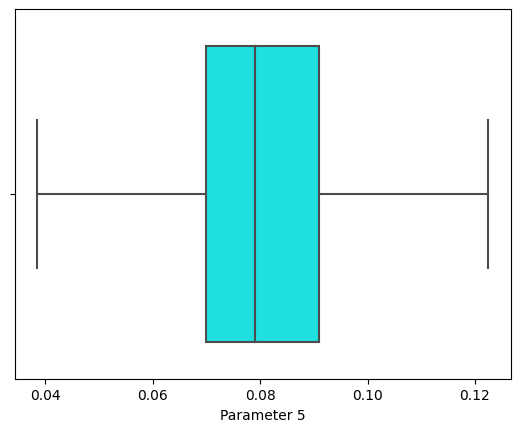

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.02099999999999999
Lower Whisker, Upper Whisker :  0.03850000000000002 , 0.12249999999999998
Out of  1359  rows in data, number of outliers are: 0


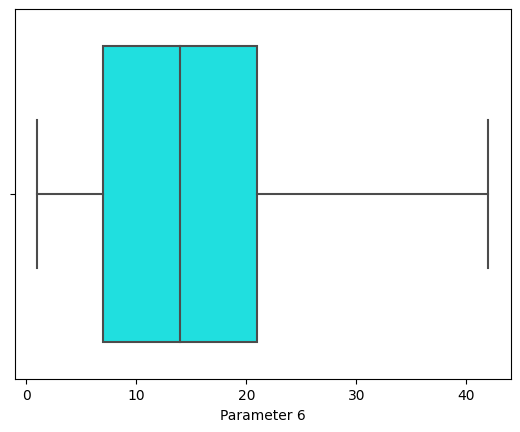

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1359  rows in data, number of outliers are: 0


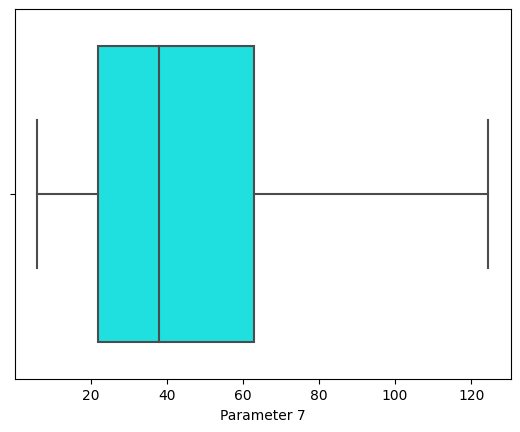

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Out of  1359  rows in data, number of outliers are: 0


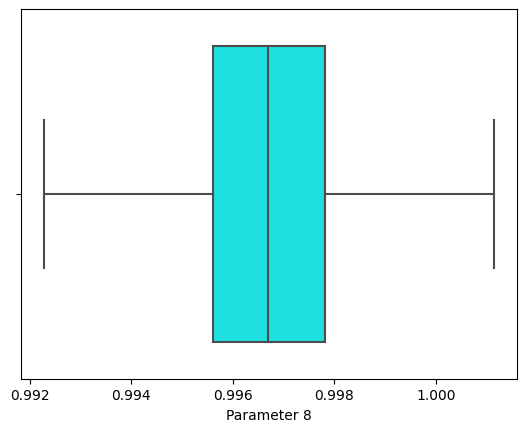

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.9967
Q3 is :  0.99782
IQR is: 0.0022199999999999998
Lower Whisker, Upper Whisker :  0.99227 , 1.00115
Out of  1359  rows in data, number of outliers are: 0


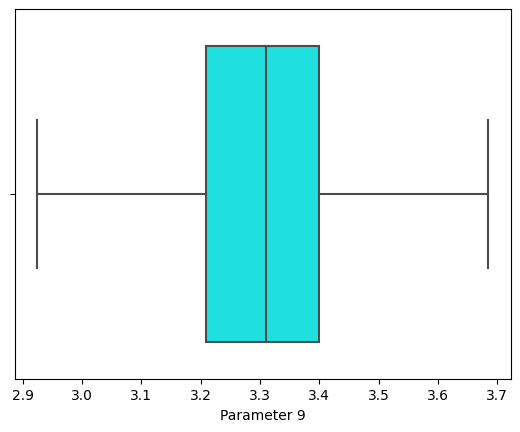

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1359  rows in data, number of outliers are: 0


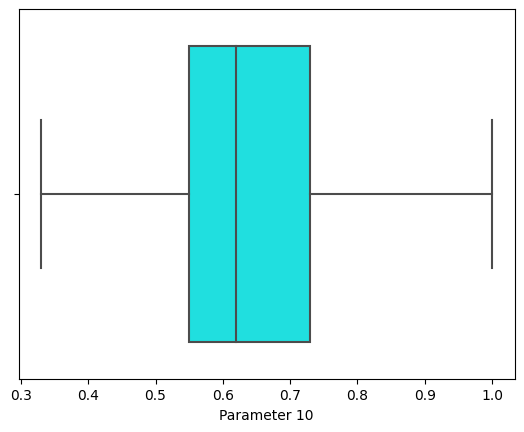

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1359  rows in data, number of outliers are: 0


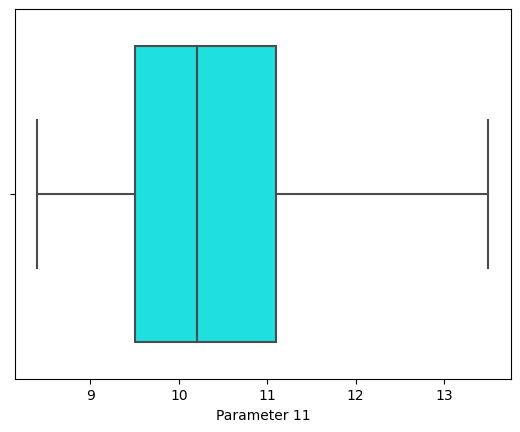

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1359  rows in data, number of outliers are: 0


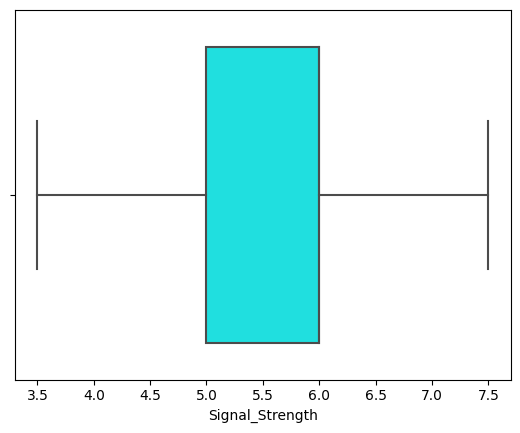

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1359  rows in data, number of outliers are: 0


In [22]:
print("After Outliner Remove Data inside visulization")
check_outliers(after_dublicate_remove_signal_data)

<AxesSubplot: >

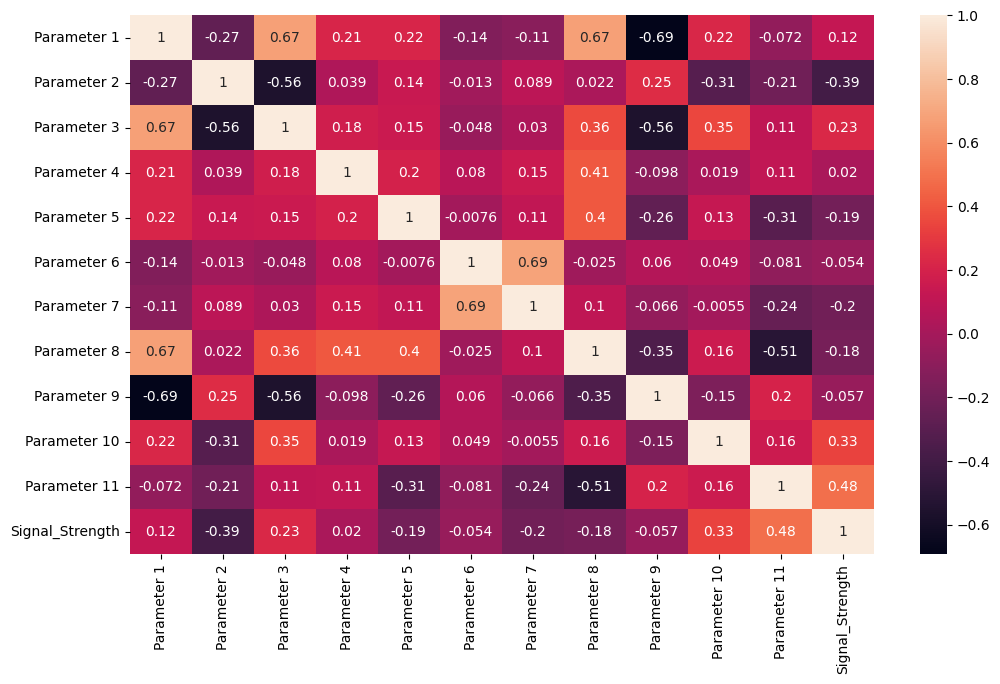

In [23]:
#correlation between the attributes
corr=after_dublicate_remove_signal_data.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(corr,annot=True)

## Data preprocessing and Target Seperation

In [24]:
#Target Data Seperation
from sklearn.model_selection import train_test_split
X = after_dublicate_remove_signal_data.drop("Signal_Strength", axis=1)
y = after_dublicate_remove_signal_data['Signal_Strength']
seed = 7

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=7)

In [26]:
print("Traing data", X_train.shape)
print("Testing data", X_test.shape)

Traing data (951, 11)
Testing data (408, 11)


In [27]:
print("target Traing data", y_train.shape)
print("target Traing data",y_test.shape)

target Traing data (951,)
target Traing data (408,)


In [28]:
import collections
from collections import Counter 
#from collections import Counter 
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers, optimizers

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
print(scaler.data_max_)
print(scaler.transform(X_train))

[1.23500e+01 1.01500e+00 7.90000e-01 3.65000e+00 1.22500e-01 4.20000e+01
 1.24500e+02 1.00115e+00 3.68500e+00 1.00000e+00 1.35000e+01]
[[0.32258065 0.50292398 0.02531646 ... 0.82236842 0.29850746 0.20833333]
 [0.28387097 0.73099415 0.         ... 0.78289474 0.32835821 0.41666667]
 [0.89032258 0.1754386  0.64556962 ... 0.13815789 0.89552239 0.22916667]
 ...
 [0.87741935 0.35087719 0.63291139 ... 0.26973684 0.55223881 0.3125    ]
 [0.3483871  0.59649123 0.02531646 ... 0.51973684 0.52238806 0.49305556]
 [0.10322581 0.78947368 0.10126582 ... 0.84868421 0.7761194  0.89583333]]


In [31]:
# Initialize Sequential model Normal single 
model_se = tf.keras.models.Sequential()
model_se.add(BatchNormalization(input_shape=(11,)))
model_se.add(Dense(1))
model_se.compile(optimizer='sgd', loss='mse')
model_se.fit(X_train_scaled, y_train, validation_data=(X_train_scaled,y_train),epochs=10, batch_size=40)

Epoch 1/10
24/24 [==============================] - 0s 7ms/step - loss: 11.2874 - val_loss: 1.4808
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 1.6966 - val_loss: 0.8520
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 1.2116 - val_loss: 0.7216
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.9651 - val_loss: 0.6622
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 0.7867 - val_loss: 0.5986
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6862 - val_loss: 0.5683
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.6366 - val_loss: 0.5559
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6030 - val_loss: 0.5306
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5559 - val_loss: 0.5173
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5390 - val_loss: 0.5031


In [32]:
score_train = model_se.evaluate(X_train_scaled, y_train, verbose=0)
print(score_train)

0.5031114220619202


In [33]:
score_test = model_se.evaluate(X_test_scaled, y_test, verbose=0)
print(score_test)

0.48558926582336426


In [34]:
results = model_se.evaluate(X_test_scaled, y_test)
print(model_se.metrics_names)
print(results)

13/13 [==============================] - 0s 1000us/step - loss: 0.4856
['loss']
0.48558926582336426


In [35]:
y_pred = model_se.predict(X_test_scaled)

13/13 [==============================] - 0s 832us/step


In [36]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.19357186539394378


In [37]:
#summary of regression model
model_se.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


In [38]:
# splitting data for  train and validation of categorial 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [39]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print("Train data counter:",Counter(y_train))
print("Test data counter:",Counter(y_test))
print("Y data counter:",Counter(y))

Train data counter: Counter({6.0: 386, 5.0: 385, 7.0: 119, 4.0: 42, 7.5: 11, 3.5: 8})
Test data counter: Counter({5.0: 192, 6.0: 149, 7.0: 48, 4.0: 11, 7.5: 6, 3.5: 2})
Y data counter: Counter({5.0: 577, 6.0: 535, 7.0: 167, 4.0: 53, 7.5: 17, 3.5: 10})


## Model fitting

In [40]:
#Apply activation fuction Model 
model = Sequential()
model.add(Dense(64, input_shape = (11,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

In [41]:
opt = optimizers.Adam(learning_rate= 0.001)
# Compile the model
model.compile(optimizer = opt,loss="mse", metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
Total params: 1,616
Trainable params: 1,488
Non-trainable params: 128
__________________________________________________

In [43]:
#model.fit(X_train, np.array(y_train), batch_size = 15, epochs = 10, verbose = 1)
model.fit(X_train, y_train, validation_data=(X_train,y_train),epochs=10, batch_size=700)

Epoch 1/10
2/2 [==============================] - 1s 120ms/step - loss: 30.9386 - accuracy: 0.0747 - val_loss: 30.9333 - val_accuracy: 0.1230
Epoch 2/10
2/2 [==============================] - 0s 29ms/step - loss: 30.9378 - accuracy: 0.0799 - val_loss: 30.9333 - val_accuracy: 0.1199
Epoch 3/10
2/2 [==============================] - 0s 26ms/step - loss: 30.9375 - accuracy: 0.0799 - val_loss: 30.9333 - val_accuracy: 0.1167
Epoch 4/10
2/2 [==============================] - 0s 26ms/step - loss: 30.9371 - accuracy: 0.0673 - val_loss: 30.9333 - val_accuracy: 0.1167
Epoch 5/10
2/2 [==============================] - 0s 24ms/step - loss: 30.9366 - accuracy: 0.0904 - val_loss: 30.9333 - val_accuracy: 0.1146
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 30.9363 - accuracy: 0.0768 - val_loss: 30.9333 - val_accuracy: 0.1104
Epoch 7/10
2/2 [==============================] - 0s 26ms/step - loss: 30.9359 - accuracy: 0.0799 - val_loss: 30.9333 - val_accuracy: 0.1083
Epoch 8/10
2

In [44]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results) 

13/13 [==============================] - 0s 1ms/step - loss: 30.6101 - accuracy: 0.0956
['loss', 'accuracy']
[30.610082626342773, 0.09558823704719543]


## Part B
**DOMAIN :**  Autonomous Vehicles

**CONTEXT :** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map 
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions 
of geo-located 360-degree panoramic images. 
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a 
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising 
numbers in photographs is a problem of interest to the optical character recognition community. 
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is 
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large 
range of fonts, colours, styles, orientations, and character arrangements. 
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as 
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around 
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, 
it is more complex than MNIST because of the distractors

In [45]:
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout


In [46]:
#Reding and Extrating data from h5 files
with h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r') as hdf:
    fl =  list(hdf.keys())
    print('HDF dataset List:', fl)
    #Reding hdf dataset
    hdf_X_test = hdf.get('X_test')
    hdf_X_train = hdf.get('X_train')
    hdf_X_val = hdf.get('X_val')
    hdf_y_test = hdf.get('y_test')
    hdf_y_train = hdf.get('y_train')
    hdf_y_val = hdf.get('y_val')
    #Normal python veriable converting and assing numpy arraly list       
    X_test = np.array(hdf_X_test)
    X_train = np.array(hdf_X_train)
    X_val = np.array(hdf_X_val)
    y_test = np.array(hdf_y_test)
    y_train = np.array(hdf_y_train)
    y_val = np.array(hdf_y_val)

HDF dataset List: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [47]:
print("Data shape::")
print('Train dataset X', X_train.shape)
print("Train data y:", y_train.shape)

print("Test data X:",X_test.shape)
print("Test data y:", y_test.shape)

print("validation data X", X_val.shape)
print("validation data y:",y_val.shape)


Data shape::
Train dataset X (42000, 32, 32)
Train data y: (42000,)
Test data X: (18000, 32, 32)
Test data y: (18000,)
validation data X (60000, 32, 32)
validation data y: (60000,)


## Data Visualisation and preprocessing

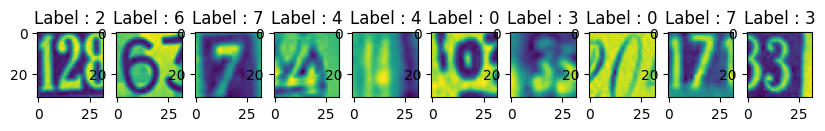

In [48]:
# show 10 Image Visualiation with  respetive labe;
def show_image_visulization(count=10):
    plt.figure(figsize=(10, 1))
    for i in range(count):
        plt.subplot(1, 10, i+1)
        plt.imshow(X_train[i])
        plt.title('Label : %s'%(y_train[i]))
    plt.show()

show_image_visulization()

In [49]:
# reshaping X data
image_vector_size =-1
X_train = X_train.reshape((X_train.shape[0], image_vector_size))
X_test = X_test.reshape((X_test.shape[0], image_vector_size))
# converting y data into categorical (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 1024)
(18000, 1024)
(42000, 10)
(18000, 10)


In [51]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000, 10)
Test set (18000, 1024) (18000, 10)


In [52]:
# confirm pixels
print('Train min=%.3f, max=%.3f' % (X_train.min(), X_train.max()))
print('Test min=%.3f, max=%.3f' % (X_test.min(), X_test.max()))

Train min=0.000, max=1.000
Test min=0.000, max=1.000


In [53]:
#Finding Inputs and output
n_inputs, n_outputs = X_train.shape[1],y_train.shape[1]
print(n_inputs, n_outputs)

1024 10


In [54]:
adam = optimizers.Adam(learning_rate=1e-3)
def model_generate(va_inputs, val_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=va_inputs,activation='relu'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(val_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=adam,  metrics=['accuracy'])
    return model

model = model_generate(n_inputs, n_outputs)

In [55]:
## Looking into our base model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                65600     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,138
Trainable params: 68,074
Non-trainable params: 64
_________________________________________________

In [56]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy', save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [57]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=50, verbose=1,callbacks=callbacks)

Epoch 1/10
650/672 [============================>.] - ETA: 0s - loss: 0.4223 - accuracy: 0.0991
Epoch 1: saving model to model_weights.h5
672/672 [==============================] - 2s 2ms/step - loss: 0.4192 - accuracy: 0.0996 - val_loss: 0.3252 - val_accuracy: 0.0974 - lr: 0.0010
Epoch 2/10
656/672 [============================>.] - ETA: 0s - loss: 0.3257 - accuracy: 0.1055
Epoch 2: saving model to model_weights.h5
672/672 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.1055 - val_loss: 0.3221 - val_accuracy: 0.1163 - lr: 0.0010
Epoch 3/10
658/672 [============================>.] - ETA: 0s - loss: 0.3230 - accuracy: 0.1149
Epoch 3: saving model to model_weights.h5
672/672 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.1152 - val_loss: 0.3200 - val_accuracy: 0.1335 - lr: 0.0010
Epoch 4/10
672/672 [==============================] - ETA: 0s - loss: 0.3204 - accuracy: 0.1294
Epoch 4: saving model to model_weights.h5
672/672 [=======

In [58]:
# predicting the model on test data
y_pred=model.predict(X_test)

563/563 [==============================] - 1s 880us/step


In [59]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results) 

563/563 [==============================] - 1s 1ms/step - loss: 0.2409 - accuracy: 0.4846
['loss', 'accuracy']
[0.24091994762420654, 0.4846111238002777]


In [60]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


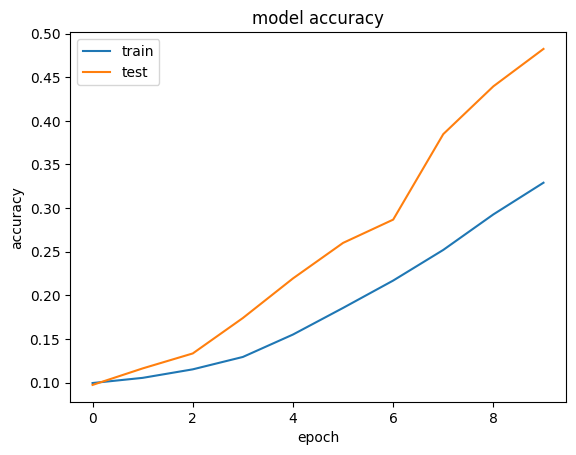

In [61]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

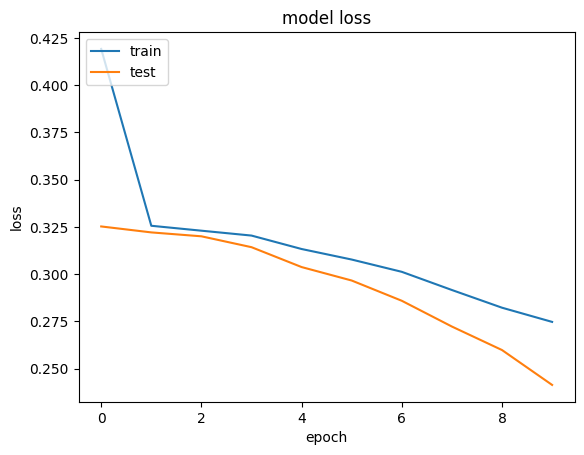

In [62]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()